In [1]:
from skimage.io import imread
from napari_workflow_optimizer import MeanSquaredErrorImageOptimizer, Workflow
import pyclesperanto_prototype as cle

/Users/haase/code/pyclesperanto_prototype/pyclesperanto_prototype/_tier0/_pycl.py:30: UserWarning: Data type double is not supported by your GPU. Will use float instead.
  warnings.warn("Data type double is not supported by your GPU. Will use float instead.")


In [2]:
w = Workflow()
# define background subtraction
w.set("blurred", cle.gaussian_blur, "input", sigma_x=7, sigma_y=3)

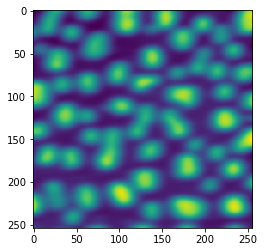

In [3]:
w.set("input", imread("/Users/haase/data/blobs.tif"))
result = w.get("blurred")

cle.imshow(result)

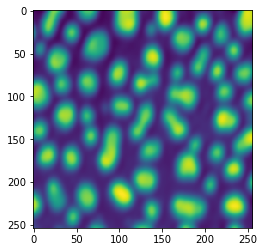

In [4]:
ground_truth = cle.gaussian_blur(imread("/Users/haase/data/blobs.tif"), sigma_x=3, sigma_y=5)
cle.imshow(ground_truth)

In [5]:
mseio = MeanSquaredErrorImageOptimizer(w)
mseio.get_numeric_parameters()

3 3


[7, 3, 0]

In [6]:
mseio.fix_parameter(2)
mseio.get_numeric_parameters()

[7, 3]

In [7]:
mseio.get_all_numeric_parameter_names()

['sigma_x', 'sigma_y', 'sigma_z']